In [58]:
import graph_tool.all as gt
import random
import numpy as np

In [155]:
g = gt.Graph(directed=False)
name = g.vp["name"] = g.new_vp("string")
kind = g.vp["kind"] = g.new_vp("int")
weight = g.ep["count"] = g.new_ep("float")
edge_kind = g.ep["edge_kind"] = g.new_ep("int")



D = 100
W = 20
W1 = 10

for i in range(D):
    n = g.add_vertex()
    name[n]=i
    kind[n]=0
        
for i in range(W):
    n = g.add_vertex()
    name[n]=i+D
    kind[n]=1
    
for i in range(W1):
    n = g.add_vertex()
    name[n]=i+D+W
    kind[n]=2
    
for i in range(D):
    for j in range(W):
        e = g.add_edge(i,j+D, False)
        weight[e] = int(random.randint(1,5))
        edge_kind[e] = 1
    for j in range(W1):
        e = g.add_edge(i,j+D+W, False)
        weight[e] = int(random.randint(1,5))
        edge_kind[e] = 2

In [156]:
for _ in range(1000):
    i = random.randint(0, D-1)
    j = random.randint(D, D+W-1)
    e = g.add_edge(i, j, False)
    weight[e] = random.randint(1,100)
    edge_kind[e] = 0

In [157]:
%load_ext autoreload
%autoreload 2
from trisbm import trisbm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
model = trisbm()
model.load_graph("graph.xml.gz")

In [159]:
g = model.g

In [160]:
len(list(g.vertices())),len(list(g.edges()))

(61, 523)

In [161]:
clabel = g.vp['kind']
state_args = {'clabel': clabel, 'pclabel': clabel}
state_args["eweight"] = g.ep.count

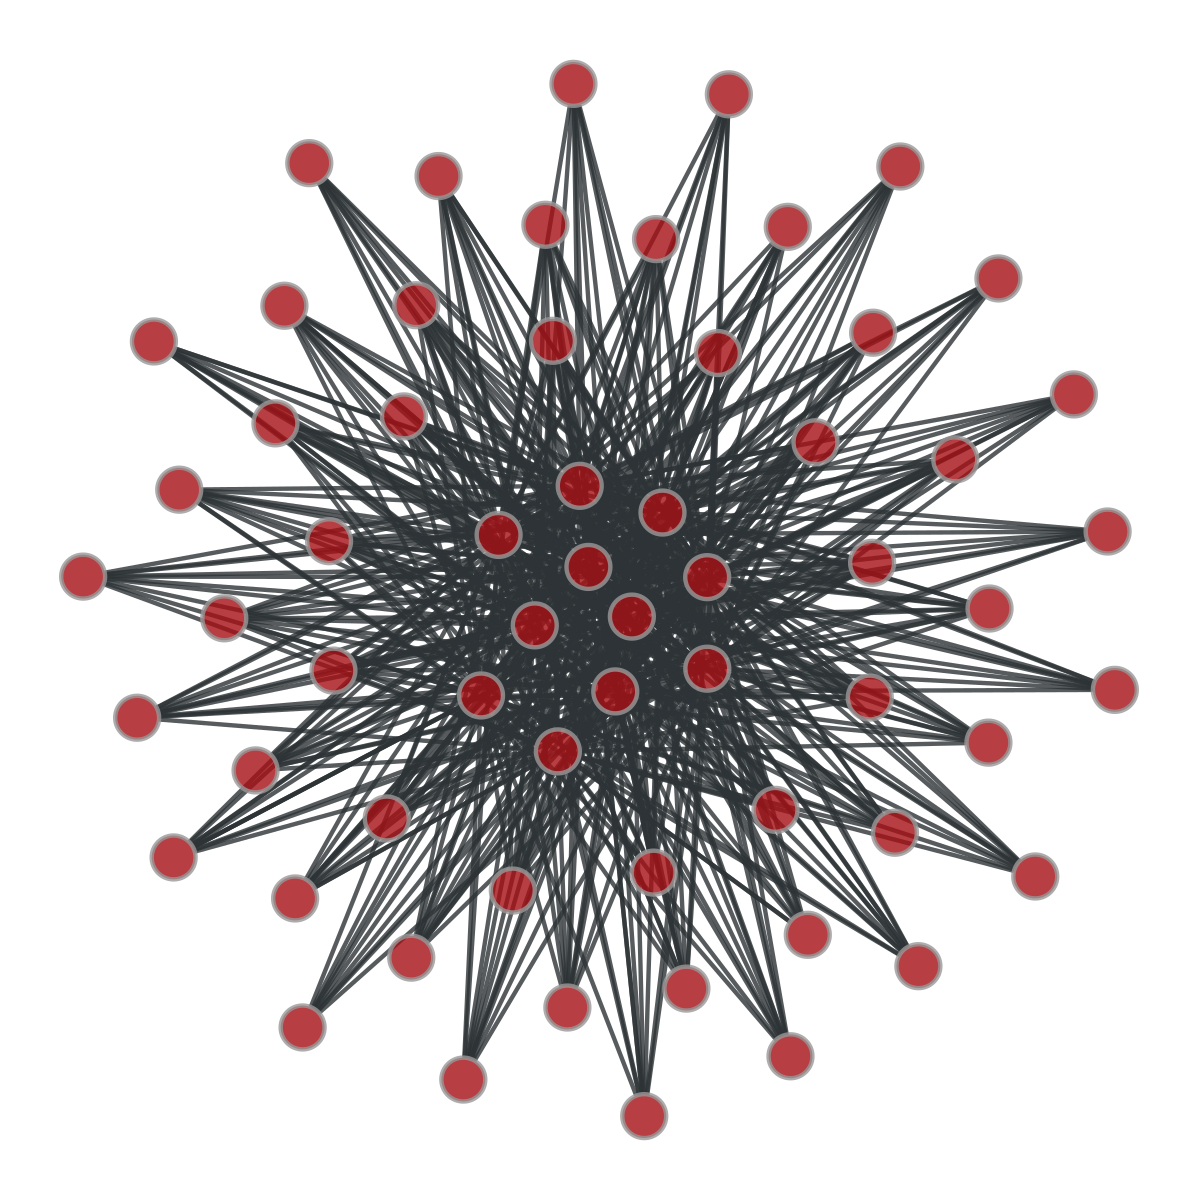

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efc4af7a760, at 0x7efc4a90a040>

In [162]:
gt.graph_draw(g)

In [163]:
model.fit()

    l=1  Current bracket: (3, 3, 3) (40.04298638251378, 40.04298638251378, 40.04298638251378)
    l=1  Current bracket: (3, 3, 3) (40.04298638251378, 40.04298638251378, 40.04298638251378)
    l=1  Bisect at B = 3 with S = 40.04298638251378
    l=1  Best result: B = 3, S = 40.04298638251378
level 1 : rejected replacement (3, 1) -> (3, 3) , dS: 2.8903717578962187
    l=1  Current bracket: (3, 3, 3) (40.04298638251378, 40.04298638251378, 40.04298638251378)
    l=1  Current bracket: (3, 3, 3) (40.04298638251378, 40.04298638251378, 40.04298638251378)
    l=1  Bisect at B = 3 with S = 40.04298638251378
    l=1  Best result: B = 3, S = 40.04298638251378
level 1 : rejected insert 3 , dS: 5.780743515792437
    l=0      B: 27 <- 61    shrinking 61 -> 47
    l=0      B: 27 <- 61    B=47  niter:     1  count:    1  breaks:  1  min_S: 1361.5665  max_S: 1361.5665  S: 1361.5665  ΔS:      0.00000  moves:     0 
    l=0      B: 27 <- 61    shrinking 47 -> 36
    l=0      B: 27 <- 61    B=36  niter:    

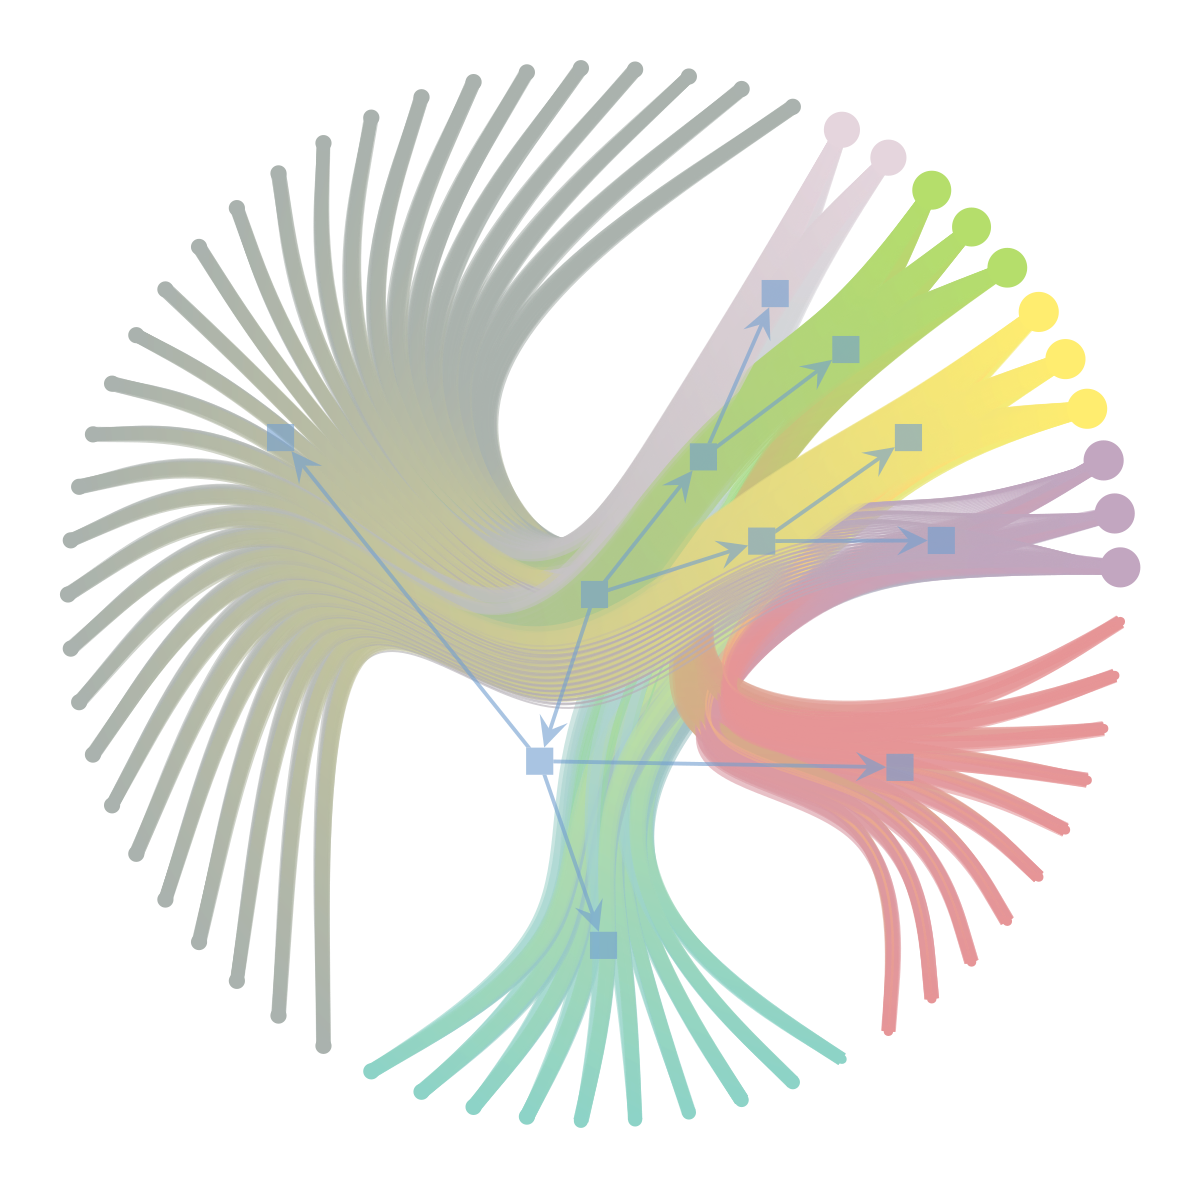

In [164]:
model.draw()

In [167]:
state = model.state.copy(bs=model.state.get_bs() + [np.zeros(1)] * 4, sampling = True)
for _ in range(100):
    state.multiflip_mcmc_sweep(beta=np.inf)

In [168]:
model.state.entropy(), state.entropy()

(1096.0650897494959, 1061.8028468827745)

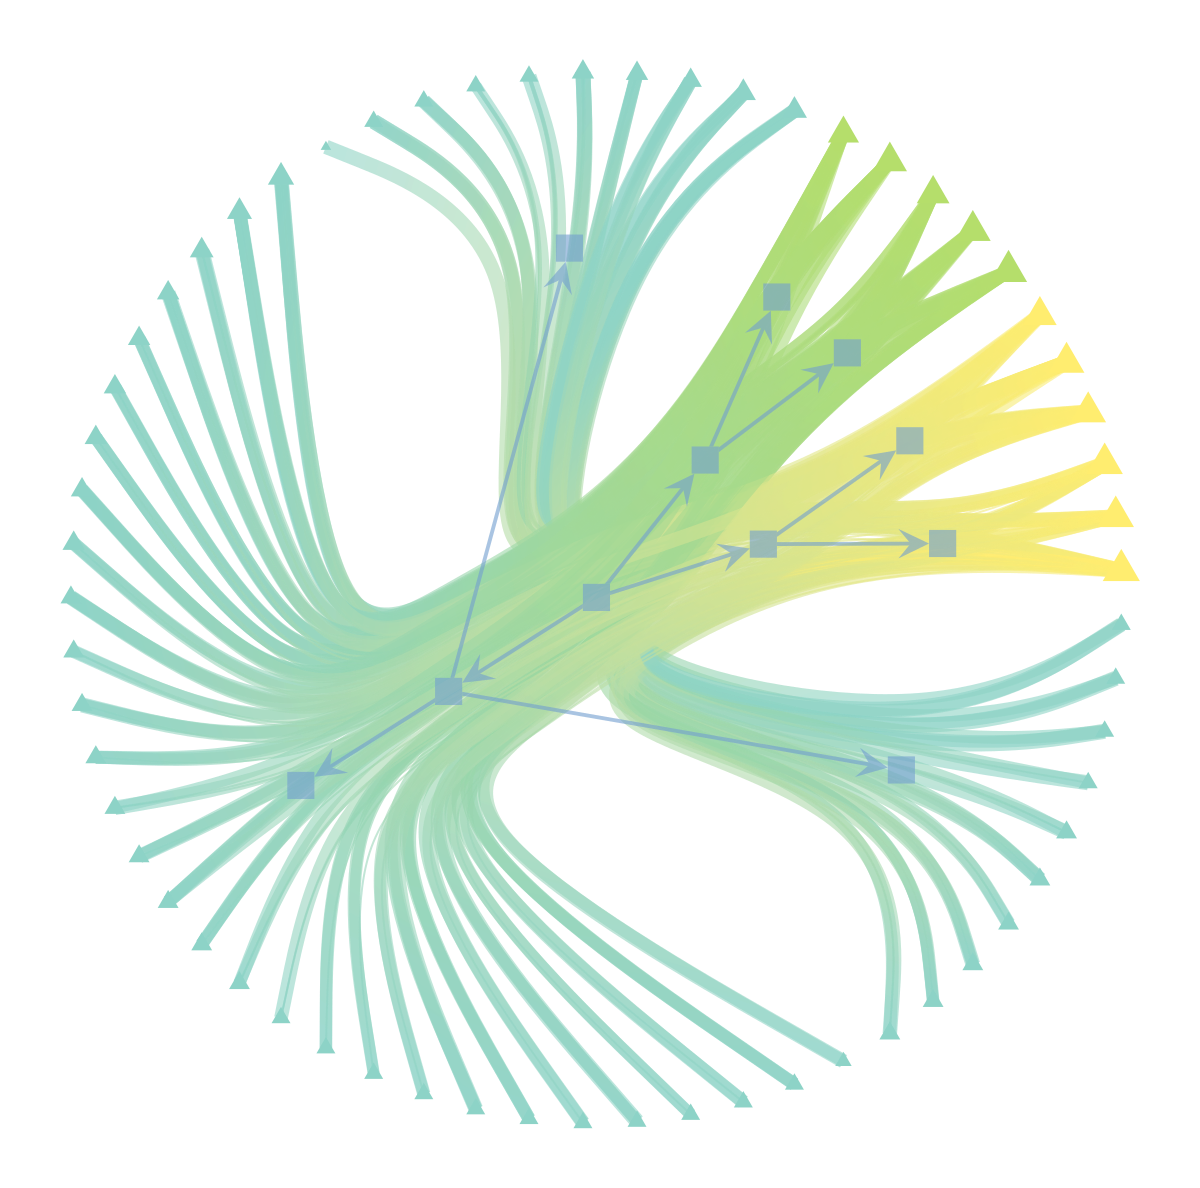

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efc4af7a760, at 0x7efc4a4c63d0>,
 <Graph object, directed, with 72 vertices and 71 edges, at 0x7efc4a4b4ac0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efc4a4b4ac0, at 0x7efc4abcdd00>)

In [172]:
state.draw(
            subsample_edges=200,
            edge_pen_width=g.ep["count"],
            #edge_color = edge_kind,
            #edge_fill_color = edge_kind,
            vertex_color=g.vp["kind"],        
            vertex_fill_color=g.vp["kind"],
            vertex_shape="triangle",
            #output="network.pdf"
)